In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('ds_salaries.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [5]:
df.isna()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
3750,False,False,False,False,False,False,False,False,False,False,False
3751,False,False,False,False,False,False,False,False,False,False,False
3752,False,False,False,False,False,False,False,False,False,False,False
3753,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
df.shape

(3755, 11)

In [8]:
duplicates = df[df.duplicated(keep='last')]

# Drop the duplicate rows from the original dataframe
df_cleaned = df.drop_duplicates()

df_usa=df_cleaned[df_cleaned['company_location']=='US']

# Save the cleaned dataset to a new CSV file
df_usa.to_csv('cleaned_usa_data.csv', index=False)

In [9]:
df_usa.shape

(1929, 11)

In [10]:
df = pd.read_csv("cleaned_usa_data.csv")

In [11]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
1,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
2,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
3,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
4,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
1924,2021,SE,FT,Data Specialist,165000,USD,165000,US,100,US,L
1925,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
1926,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
1927,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S


In [12]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,1929.000000,1.929000e+03,1929.000000,1929.000000
mean,2022.412131,1.615836e+05,152374.791602,48.548471
std,0.664511,2.739858e+05,59786.145995,49.483514
min,2020.000000,1.200000e+04,5679.000000,0.000000
25%,2022.000000,1.100000e+05,110000.000000,0.000000
50%,2022.000000,1.460000e+05,145885.000000,0.000000
75%,2023.000000,1.881000e+05,187200.000000,100.000000
max,2023.000000,1.100000e+07,450000.000000,100.000000


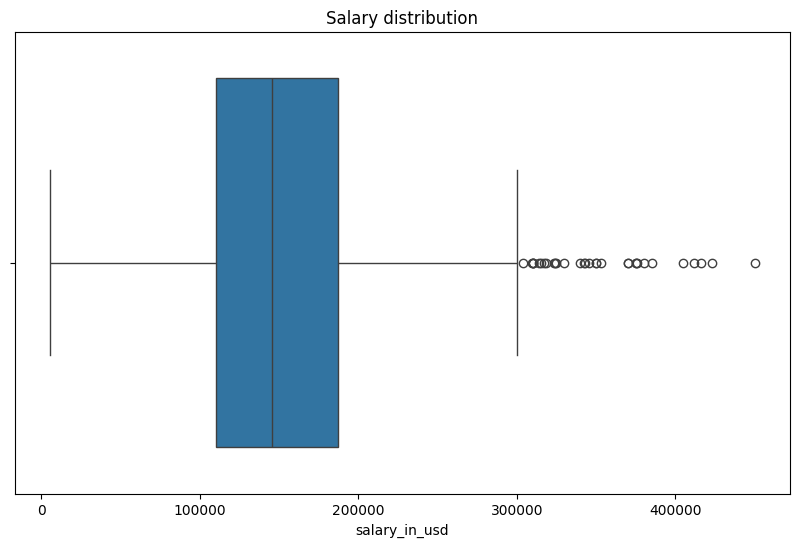

In [13]:
#box plot
plt.figure(figsize=(10,6))
sns.boxplot(x='salary_in_usd', data=df)
plt.title('Salary distribution')
plt.show()

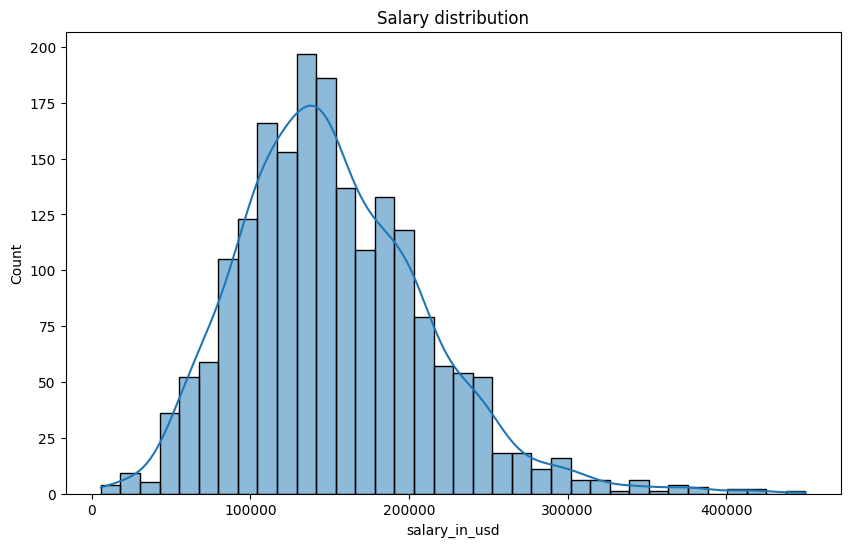

In [19]:
# Histogram
plt.figure(figsize=(10,6))
sns.histplot(df['salary_in_usd'], kde=True)
plt.title('Salary distribution')
plt.show()


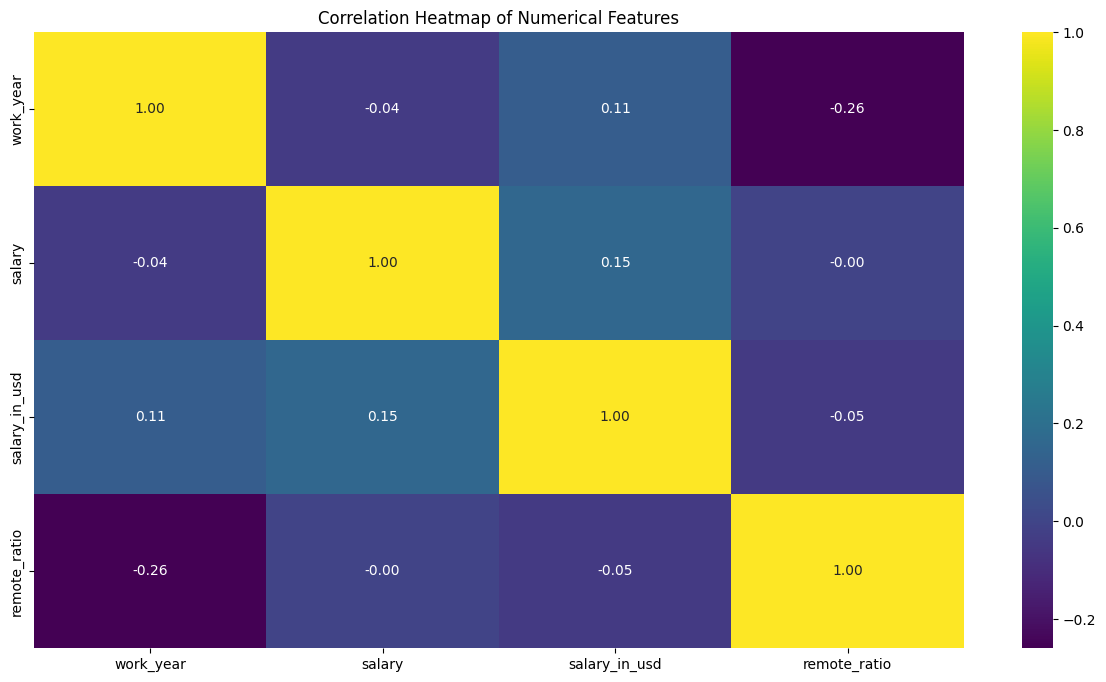

In [38]:
# Select only numerical features for correlation analysis
numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Plotting the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


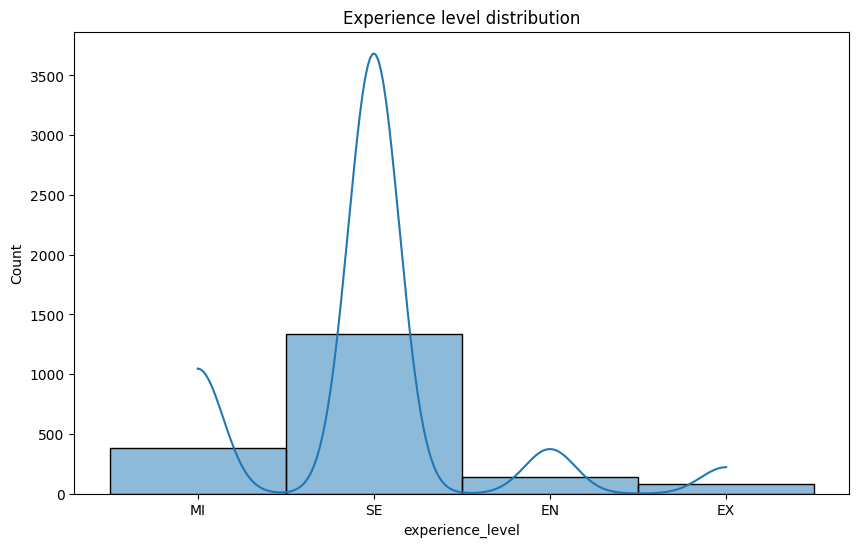

In [39]:
#histogram for experience_level column and salary_in_usd column

plt.figure(figsize=(10,6))
sns.histplot(df['experience_level'], kde=True)
plt.title('Experience level distribution')
plt.show()
